In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [19]:
%run opt_utils.ipynb

# 1. Gradient Descent

In [3]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    L = len(parameters) // 2
    
    for l in range(L):
        parameters['W' + str(l + 1)] = parameters['W' + str(l + 1)] - learning_rate*grads['dW' + str(l + 1)]
        parameters['b' + str(l + 1)] = parameters['b' + str(l + 1)] - learning_rate*grads['db' + str(l + 1)]
    
    return parameters

# 2. Mini-Batch Gradient Descent

In [4]:
def random_mini_batches(X, Y, mini_batch_size = 64):
    m = X.shape[1]
    mini_batches = []
    
    # Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1, m))
    
    # Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size)
    for i in range(num_complete_minibatches):
        mini_batch_X = shuffled_X[:, i * mini_batch_size: (i + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, i * mini_batch_size: (i + 1) * mini_batch_size]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : ]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : ]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    return mini_batches

# 3. Momentum

In [5]:
def initialize_velocity(parameters):
    L = len(parameters) // 2
    v = {}
    
    for l in range(L):
        v['dW' + str(l + 1)] = np.zeros((parameters['W' + str(l+1)].shape[0],parameters['W' + str(l+1)].shape[1]))
        v['db' + str(l + 1)] = np.zeros((parameters['b' + str(l+1)].shape[0],parameters['b' + str(l+1)].shape[1]))
    
    return v

In [6]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    L = len(parameters) // 2
    
    for l in range(L):
        v['dW' + str(l + 1)] = beta * v['dW' + str(l + 1)] + (1 - beta) * grads['dW' + str(l + 1)]
        v['db' + str(l + 1)] = beta * v['db' + str(l + 1)] + (1 - beta) * grads['db' + str(l + 1)]
        parameters['W' + str(l + 1)] = parameters['W' + str(l + 1)] - learning_rate * v['dW' + str(l + 1)]
        parameters['b' + str(l + 1)] = parameters['b' + str(l + 1)] - learning_rate * v['db' + str(l + 1)]
    
    return parameters, v

# 4. RMSprop (Root mean squared prop)

In [7]:
def initialize_RMSprop(parameters):
    L = len(parameters) // 2
    s = {}
    
    for l in range(L):
        s['dW' + str(l + 1)] = np.zeros((parameters['W' + str(l+1)].shape[0],parameters['W' + str(l+1)].shape[1]))
        s['db' + str(l + 1)] = np.zeros((parameters['b' + str(l+1)].shape[0],parameters['b' + str(l+1)].shape[1]))
        
    return s

In [32]:
def update_parameters_with_RMSprop(parameters, grads, s, beta, learning_rate, epsilon = 1e-8):
    L = len(parameters) // 2
    
    for l in range(L):
        s['dW' + str(l + 1)] = beta * s['dW' + str(l + 1)] + (1 - beta) * np.power(grads['dW' + str(l + 1)], 2)
        s['db' + str(l + 1)] = beta * s['db' + str(l + 1)] + (1 - beta) * np.power(grads['db' + str(l + 1)], 2)
        
        parameters['W' + str(l + 1)] -= learning_rate * np.divide(grads['dW' + str(l + 1)], np.sqrt(s['dW' + str(l + 1)]) + epsilon)
        parameters['b' + str(l + 1)] -= learning_rate * np.divide(grads['db' + str(l + 1)], np.sqrt(s['db' + str(l + 1)]) + epsilon)
    
    return parameters, s

# 5. Adam (Adaptive Moment Estimation)

In [10]:
def initialize_Adam(parameters):
    L = len(parameters) // 2
    v = {}
    s = {}
    
    for l in range(L):
        v['dW' + str(l + 1)] = np.zeros((parameters['W' + str(l+1)].shape[0],parameters['W' + str(l+1)].shape[1]))
        v['db' + str(l + 1)] = np.zeros((parameters['b' + str(l+1)].shape[0],parameters['b' + str(l+1)].shape[1]))
        s['dW' + str(l + 1)] = np.zeros((parameters['W' + str(l+1)].shape[0],parameters['W' + str(l+1)].shape[1]))
        s['db' + str(l + 1)] = np.zeros((parameters['b' + str(l+1)].shape[0],parameters['b' + str(l+1)].shape[1]))
        
    return v, s

In [11]:
def update_parameters_with_Adam(parameters, grads, v, s, t, learning_rate = 0.01,
                               beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8):
    L = len(parameters) // 2
    v_corrected = {}
    s_corrected = {}
    
    for l in range(L):
        v['dW' + str(l + 1)] = beta1 * v['dW' + str(l + 1)] + (1 - beta1) * grads['dW' + str(l + 1)]
        v['db' + str(l + 1)] = beta1 * v['db' + str(l + 1)] + (1 - beta1) * grads['db' + str(l + 1)]
        
        s['dW' + str(l + 1)] = beta2 * s['dW' + str(l + 1)] + (1 - beta2) * np.power(grads['dW' + str(l + 1)], 2)
        s['db' + str(l + 1)] = beta2 * s['db' + str(l + 1)] + (1 - beta2) * np.power(grads['db' + str(l + 1)], 2)
        
        v_corrected['dW' + str(l + 1)] = v['dW' + str(l + 1)] / (1 - np.power(beta1, t))
        v_corrected['db' + str(l + 1)] = v['db' + str(l + 1)] / (1 - np.power(beta1, t))
        
        s_corrected['dW' + str(l + 1)] = s['dW' + str(l + 1)] / (1 - np.power(beta2, t))
        s_corrected['db' + str(l + 1)] = s['db' + str(l + 1)] / (1 - np.power(beta2, t))
        
        parameters['W' + str(l + 1)] -= learning_rate * np.divide(v_corrected['dW' + str(l + 1)], np.sqrt(s_corrected['dW' + str(l + 1)]) + epsilon)
        parameters['b' + str(l + 1)] -= learning_rate * np.divide(v_corrected['db' + str(l + 1)], np.sqrt(s_corrected['db' + str(l + 1)]) + epsilon)
        
    return parameters, v, s

# 6. Model with different optimization algorithms

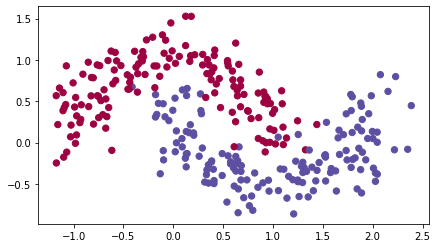

In [13]:
train_X, train_Y = load_datasets()

In [15]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
                    beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    L = len(layers_dims)
    costs = []
    t = 0
    
    parameters = initialize_parameters(layers_dims)
    
    if optimizer == 'gd':
        pass
    elif optimizer == 'momentum':
        v = initialize_velocity(parameters)
    elif optimizer == 'rmsprop':
        s = initialize_RMSprop(parameters)
    elif optimizer == 'adam':
        v, s = initialize_Adam(parameters)
    
    for i in range(num_epochs):
        minibatches = random_mini_batches(X, Y, mini_batch_size)
        for minibatch in minibatches:
            (minibatch_X, minibatch_Y) = minibatch
            # Forward
            A3, cache = forward_propagation(minibatch_X, parameters)
            # Cost
            cost = compute_cost(A3, minibatch_Y)
            # Backward
            grads = backward_propagation(minibatch_X, minibatch_Y, cache)
            # Update parameters
            if optimizer == 'gd':
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == 'momentum':
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == 'rmsprop':
                parameters, s = update_parameters_with_RMSprop(parameters, grads, s, beta, learning_rate)
            elif optimizer == 'adam':
                t = t + 1
                parameters, v, s = update_parameters_with_Adam(parameters, grads, v, s, t, learning_rate, beta1, beta2, epsilon)
            
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

## 6.1 Batch gradient descent

Cost after epoch 0: 0.674178
Cost after epoch 1000: 0.618947
Cost after epoch 2000: 0.581255
Cost after epoch 3000: 0.550856
Cost after epoch 4000: 0.526297
Cost after epoch 5000: 0.506366
Cost after epoch 6000: 0.489653
Cost after epoch 7000: 0.475333
Cost after epoch 8000: 0.462848
Cost after epoch 9000: 0.451809


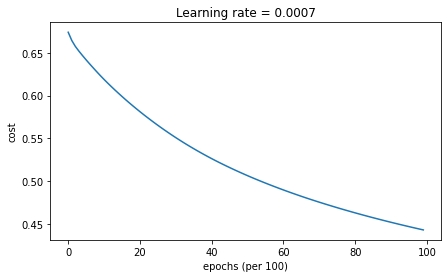

Accuracy: 0.8266666666666667


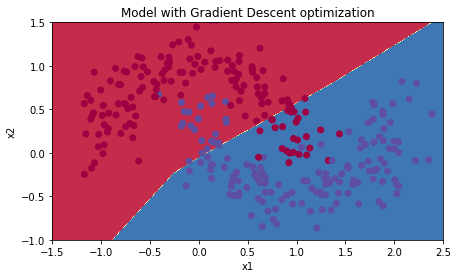

In [20]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
m = train_X.shape[1]
parameters_gd = model(train_X, train_Y, layers_dims, optimizer = "gd", mini_batch_size=m)
# Predict
predictions = predict(train_X, train_Y, parameters_gd)
# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters_gd, x.T), train_X, train_Y)

## 6.2 Mini-batch gradient descent

Cost after epoch 0: 0.555431
Cost after epoch 1000: 0.539293
Cost after epoch 2000: 0.417289
Cost after epoch 3000: 0.391158
Cost after epoch 4000: 0.363791
Cost after epoch 5000: 0.360050
Cost after epoch 6000: 0.317141
Cost after epoch 7000: 0.326176
Cost after epoch 8000: 0.310030
Cost after epoch 9000: 0.260551


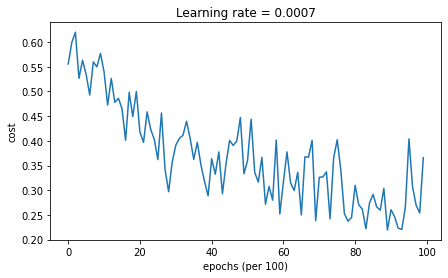

Accuracy: 0.89


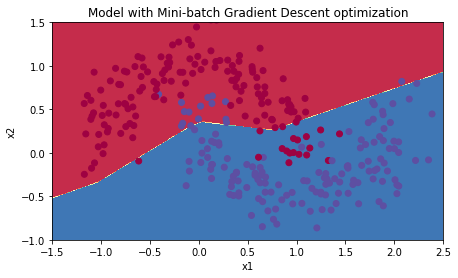

In [21]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters_mgd = model(train_X, train_Y, layers_dims, optimizer = "gd")
# Predict
predictions = predict(train_X, train_Y, parameters_mgd)
# Plot decision boundary
plt.title("Model with Mini-batch Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters_mgd, x.T), train_X, train_Y)

## 6.3 Stochastic Gradient Descent

Cost after epoch 0: 0.711054


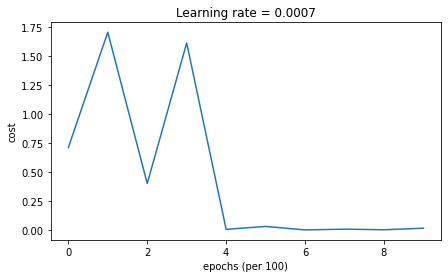

Accuracy: 0.9733333333333334


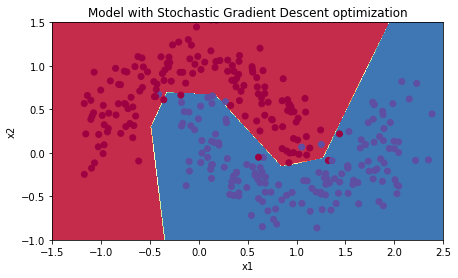

In [24]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters_sgd = model(train_X, train_Y, layers_dims, optimizer = "gd", mini_batch_size = 1, num_epochs = 1000)
# Predict
predictions = predict(train_X, train_Y, parameters_sgd)
# Plot decision boundary
plt.title("Model with Stochastic Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters_sgd, x.T), train_X, train_Y)

Cost after epoch 0: 0.791050


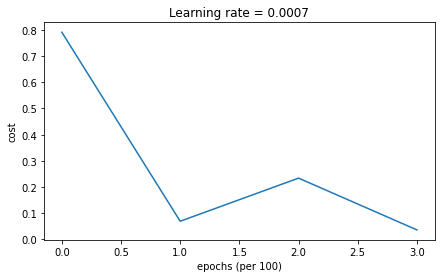

Accuracy: 0.9733333333333334


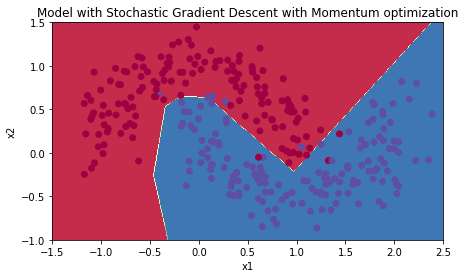

In [35]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters_sgd_m = model(train_X, train_Y, layers_dims, optimizer = "momentum", mini_batch_size = 1, num_epochs = 400)
# Predict
predictions = predict(train_X, train_Y, parameters_sgd_m)
# Plot decision boundary
plt.title("Model with Stochastic Gradient Descent with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters_sgd_m, x.T), train_X, train_Y)

## 6.4 Mini-batch Gradient Descent with momentum

Cost after epoch 0: 0.678178
Cost after epoch 1000: 0.644513
Cost after epoch 2000: 0.509690
Cost after epoch 3000: 0.411665
Cost after epoch 4000: 0.381767
Cost after epoch 5000: 0.440447
Cost after epoch 6000: 0.391834
Cost after epoch 7000: 0.300711
Cost after epoch 8000: 0.344992
Cost after epoch 9000: 0.250705


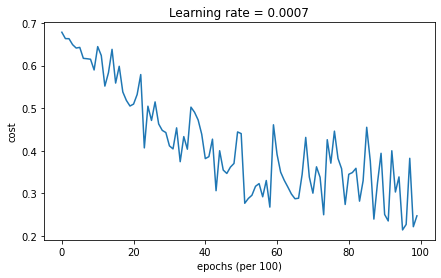

Accuracy: 0.8633333333333333


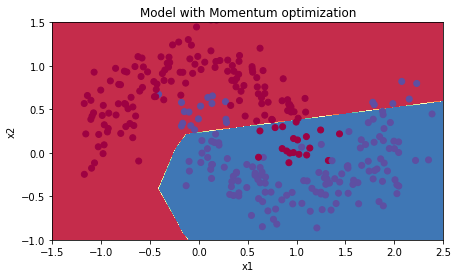

In [27]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters_momentum = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")
# Predict
predictions = predict(train_X, train_Y, parameters_momentum)
# Plot decision boundary
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters_momentum, x.T), train_X, train_Y)

## 6.5 RMSprop 

Cost after epoch 0: 0.734905
Cost after epoch 1000: 0.186362
Cost after epoch 2000: 0.031569
Cost after epoch 3000: 0.015718
Cost after epoch 4000: 0.038271
Cost after epoch 5000: 0.112330
Cost after epoch 6000: 0.146491
Cost after epoch 7000: 0.040057
Cost after epoch 8000: 0.056911
Cost after epoch 9000: 0.013957


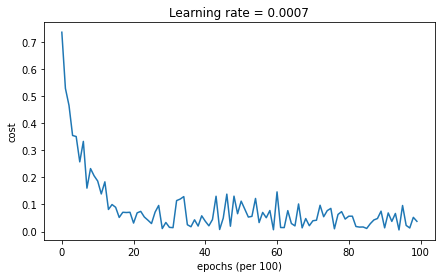

Accuracy: 0.98


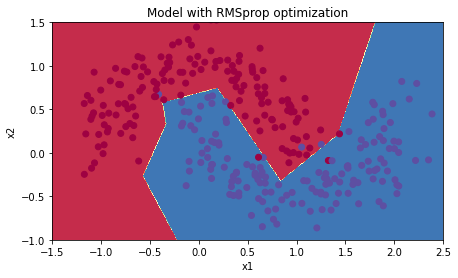

In [33]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters_rmsprop = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "rmsprop")
# Predict
predictions = predict(train_X, train_Y, parameters_rmsprop)
# Plot decision boundary
plt.title("Model with RMSprop optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters_rmsprop, x.T), train_X, train_Y)

## 6.6 Adam

Cost after epoch 0: 0.959339
Cost after epoch 1000: 0.067962


<ipython-input-19-963737891781>:4: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.nansum(np.multiply(Y, np.log(A3)) + np.multiply(1 - Y, np.log(1 - A3)))
<ipython-input-19-963737891781>:4: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.nansum(np.multiply(Y, np.log(A3)) + np.multiply(1 - Y, np.log(1 - A3)))


Cost after epoch 2000: 0.048241
Cost after epoch 3000: 0.057863
Cost after epoch 4000: 0.037085
Cost after epoch 5000: 0.119246
Cost after epoch 6000: 0.029182
Cost after epoch 7000: 0.079401
Cost after epoch 8000: 0.047656
Cost after epoch 9000: 0.092263


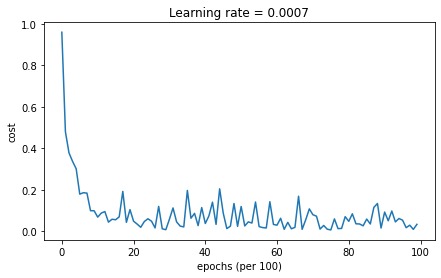

Accuracy: 0.9766666666666667


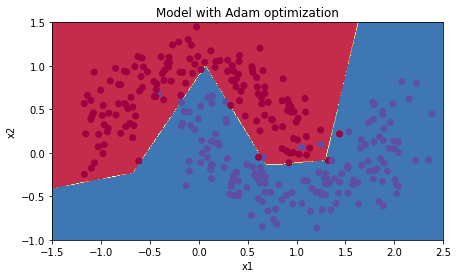

In [31]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters_adam = model(train_X, train_Y, layers_dims, optimizer = "adam")
# Predict
predictions = predict(train_X, train_Y, parameters_adam)
# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters_adam, x.T), train_X, train_Y)

# Nhận xét:
### Tổng quát:
- Gradient Descent mượt hơn các optimization algorithm khác vì nó tính đạo hàm trên cả tập huấn luyện rồi mới cập nhật trọng số nên kết quả sẽ không bị ảnh hưởng bởi những dữ liệu nhiễu. Cũng chính vì đạo hàm trên cả tập huấn luyện nên dữ liệu đại diện cho các thuộc tính và có thể dễ dàng tìm được điểm global minimum. Tuy nhiên kết quả sẽ không được tốt bằng các optimization algorithm khác.
- Mini-batch GD đường đi của hàm loss không được mượt bằng GD vì nó tính gradient trên từng mini batch để cập nhật trọng số, nên mỗi epoch trọng số sẽ được cập nhật m/mini_batch_size lần, vậy nên nó có thể quét được qua hết các trường hợp có thể. Kết quả đã tốt hơn GD nhưng không phải là tốt nhất.
- Stochastic GD đã cho kết quả tốt hơn GD và MGD rất nhiều và cho kết quả rất tốt. Vì nó tính đạo hàm trên từng mẫu để cập nhật trọng số, nên mỗi epoch trọng số sẽ được cập nhật m lần. Vì vậy chỉ cần chạy qua vài epochs là đã có được kết quả tốt rồi. Tuy nhiên, vì đạo hàm trên từng mẫu nên SGD dễ bị ảnh hưởng bởi mẫu dữ liệu nên khó tìm điểm global minimum.
- Mini-batch GD with momentum cho kết quả tốt hơn mini-batch GD thuần. Đường đi của hàm loss mượt hơn và hội tụ nhanh hơn vì momentum giúp dễ dàng vuợt qua điểm local minimum.
- RMSprop và Adam đều cho kết quả rất tốt, hàm số hội tụ nhanh.

### Ưu điểm
- GD:
    + Đơn giản, dễ hiểu, phù hợp với những bài toán dữ liệu vừa và nhỏ.
    + Không bị ảnh hưởng lớn bởi giá trị ngoại lai.
- Mini-batch GD:
    + Tần suất cập nhật mô hình cao hơn => Cung cấp hiệu quả về mặt tính toán.
    + Tối ưu bộ nhớ, phù hợp với những bài toán dữ liệu lớn.
- Stochastic GD:
    + Weight cập nhật nhanh hơn.
    + Tiêu thụ bộ nhớ thấp.
    + Nhanh hơn GD và mini-batch GD.
- Momentum:
    + Dễ dàng vượt qua các điểm local minimum để có thể đến được điểm global minimum.
- RMSprop:
    + Giải quyết được vấn đề về tốc độ học => dễ dàng hội tụ hơn.
- Adam:
    + Là sự kết hợp của Momentum và RMSprop nên giải quyết được vấn đề về điểm local minimun, khi đến global minimum thì không mất nhiều thời gian giao động qua lại xung quanh mà dễ dàng hội tụ hơn =>  Được sử dụng nhiều nhất.

### Nhược điểm
- GD:
    + Phụ thuộc vào nghiệm khởi tạo ban đầu và learning rate.
    + Tiêu thụ bộ nhớ cao => Không phù hợp với những bài toán có dữ liệu lớn, việc tối ưu hóa chậm
- Mini-batch GD:
    + Không đảm bảo loss sẽ hội tụ tốt hơn GD.
    + Dữ liệu được lấy không đại diện cho các thuộc tính (hoặc phương sai) => Khó có được sự hội tụ.
    + Vì mỗi bản ghi được lấy theo batch, mỗi batch có những lỗi khác nhau => phải tự kiểm soát learning rate
- Stochastic GD:
    + Phụ thuộc vào nghiệm khởi tạo ban đầu và learning rate.
    + Dao động lớn và bị ảnh hưởng bởi mọi điểm dữ liệu => Khó có thể tìm ra được điểm global minimum
- Momentum:
    + Vì có đà nên khi đến gần điểm global minimum sẽ mất rất nhiều thời gian dao động xung quanh trước khi hội tụ.
- RMSprop:
    + Có thể cho kết quả nghiệm chỉ là local minimum chứ không phải global minimum như momentum.